In [4]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;
// avoid output into scrollable frames

<IPython.core.display.Javascript object>

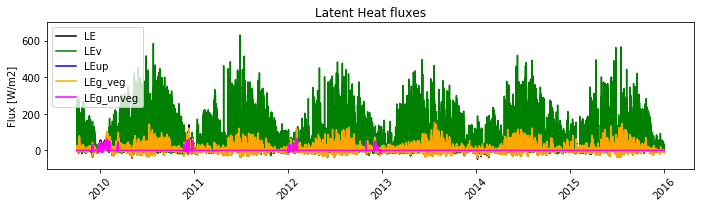

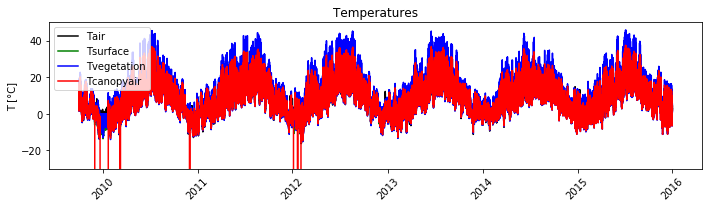

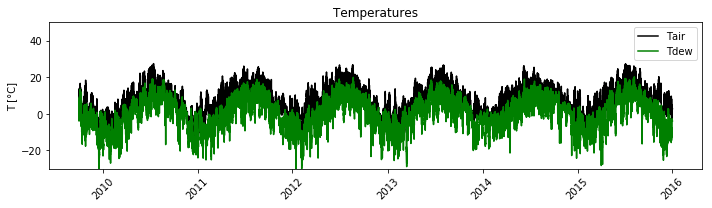

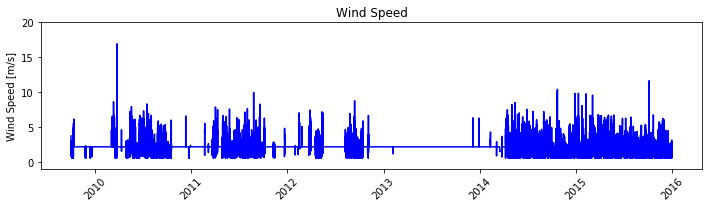

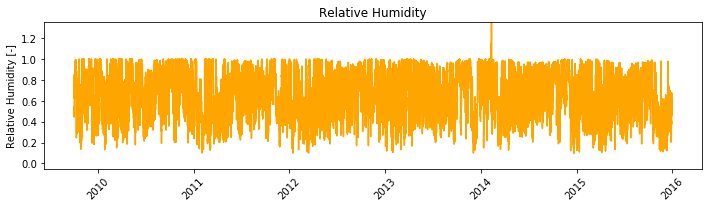

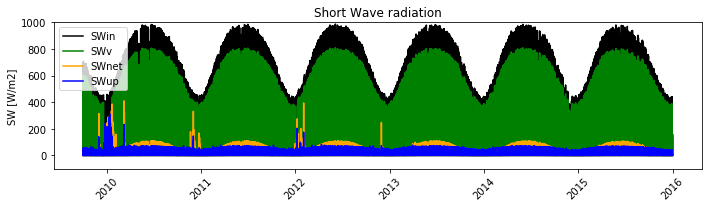

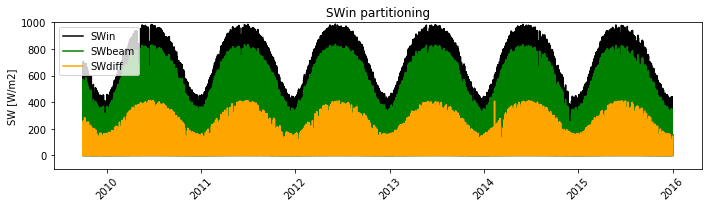

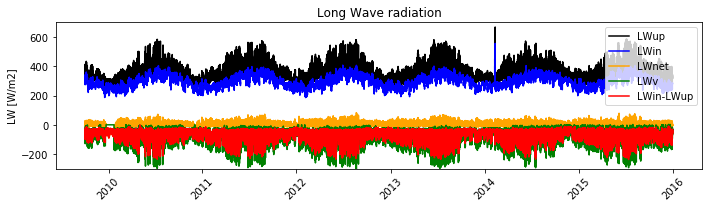

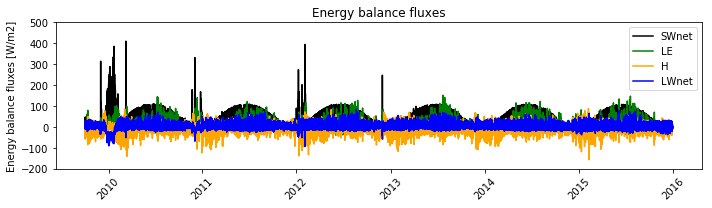

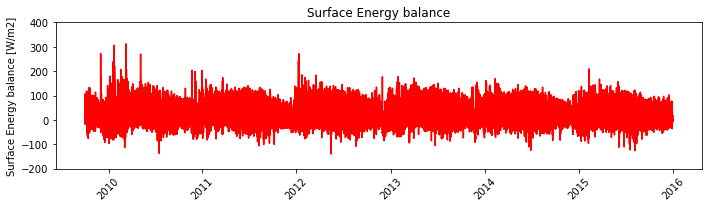

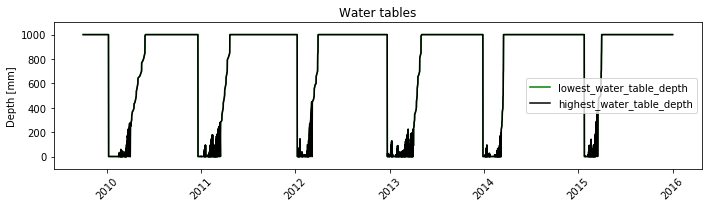

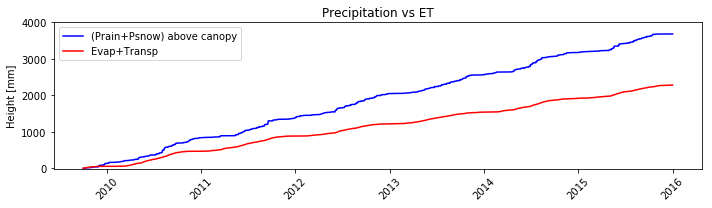

In [5]:
# %load PlotTimeSeries-point.py
# Analyse GEOtop output time series
# - point*.txt
# 
# ---
# Author: Elisa Bortoli (elisa.bortoli3@gmail.com)
# 
# Date: 08/07/2019

# Import the necessary modules
import os 
import glob
import sys
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt

# Set working paths of the simulation
try:
    sim_path = "/media/elisa/Maxtor/EURAC/POST_LAUREA/simulations/1D/Matsch_B2_Ref_007"
except:
    print("Enter the absolute path of the simulation folder!")
    sys.exit(1)  # abort
    
# Read in list of files
point_path = sim_path + r"/tabs/"

# Select only point0*.txt files
os.chdir(point_path)
unsorted_point_files = glob.glob("point0*.txt")

# Sort in alphabetical order files
point_files = sorted(unsorted_point_files, key=str.lower)

# Imports files into pandas dataframe
appended_data = []
for j,trace in enumerate(point_files):
    filepath = os.path.join(point_path, trace)
    traces_series = pd.read_csv(filepath,
                                parse_dates = ['Date12[DDMMYYYYhhmm]'], # Date format is correct
                                index_col = ['Date12[DDMMYYYYhhmm]'], # No more element indexes
                                dayfirst = True, # Coherent date format
                                na_values=['-9999']) # NaN 
    appended_data.append(traces_series)

# Plot the desired parameter
for i in range(0,len(point_files)):
    mydata = appended_data[i]
# LE 
    plt.figure(figsize = (10,3))
    plt.plot(mydata.index, mydata['LE[W/m2]'], color = 'black')
    plt.plot(mydata.index, mydata['LEv[W/m2]'], color = 'green')
    plt.plot(mydata.index, mydata['LEup[W/m2]'], color = 'blue')
    plt.plot(mydata.index, mydata['LEg_veg[W/m2]'], color = 'orange')
    plt.plot(mydata.index, mydata['LEg_unveg[W/m2]'], color = 'magenta')
    plt.xticks(rotation=45)
    plt.ylim(-100,700)
    plt.legend(['LE', 'LEv', 'LEup', 'LEg_veg','LEg_unveg'])
    plt.ylabel("Flux [W/m2]")
    plt.title("Latent Heat fluxes")
    plt.tight_layout()
    
# Temperatures
    plt.figure(figsize = (10,3))
    plt.plot(mydata.index, mydata['Tair[C]'], color = 'black')
    plt.plot(mydata.index, mydata['Tsurface[C]'], color = 'green')
    plt.plot(mydata.index, mydata['Tvegetation[C]'], color = 'blue')
    plt.plot(mydata.index, mydata['Tcanopyair[C]'], color = 'red')
    plt.xticks(rotation=45)
    plt.ylim(-30,50)
    plt.legend(['Tair', 'Tsurface', 'Tvegetation', 'Tcanopyair'])
    plt.ylabel("T [°C]")
    plt.title("Temperatures")
    plt.tight_layout()

# Meteo Input
    plt.figure(figsize = (10,3))
    plt.plot(mydata.index, mydata['Tair[C]'], color = 'black')
    plt.plot(mydata.index, mydata['Tdew[C]'], color = 'green')
    plt.xticks(rotation=45)
    plt.ylim(-30,50)
    plt.legend(['Tair', 'Tdew'])
    plt.ylabel("T [°C]")
    plt.title("Temperatures")
    plt.tight_layout()
    # -----------------------------------------------------------------------------------------------
    plt.figure(figsize = (10,3))
    plt.plot(mydata.index, mydata['Wind_speed[m/s]'], color = 'blue')
    plt.xticks(rotation=45)
    plt.ylim(-1,20)
    plt.ylabel("Wind Speed [m/s]")
    plt.title("Wind Speed")
    plt.tight_layout()
    # -----------------------------------------------------------------------------------------------
    plt.figure(figsize = (10,3))
    plt.plot(mydata.index, mydata['Relative_Humidity[-]'], color = 'orange')
    plt.xticks(rotation=45)
    plt.ylim(-0.05,1.35)
    plt.ylabel("Relative Humidity [-]")
    plt.title("Relative Humidity")
    plt.tight_layout()

# Short Wave Radiation
    plt.figure(figsize = (10,3))
    plt.plot(mydata.index, mydata['SWin[W/m2]'], color = 'black')
    plt.plot(mydata.index, mydata['SWv[W/m2]'], color = 'green')
    plt.plot(mydata.index, mydata['SWnet[W/m2]'], color = 'orange')
    plt.plot(mydata.index, mydata['SWup[W/m2]'], color = 'blue')
    plt.xticks(rotation=45)
    plt.ylim(-100,1000)
    plt.legend(['SWin', 'SWv','SWnet','SWup']) 
    plt.ylabel("SW [W/m2]")
    plt.title("Short Wave radiation")
    plt.tight_layout()

# SWin partitioning
    plt.figure(figsize = (10,3))
    plt.plot(mydata.index, mydata['SWin[W/m2]'], color = 'black')
    plt.plot(mydata.index, mydata['SWbeam[W/m2]'], color = 'green')
    plt.plot(mydata.index, mydata['SWdiff[W/m2]'], color = 'orange')
    plt.xticks(rotation=45)
    plt.ylim(-100,1000)
    plt.legend(['SWin', 'SWbeam','SWdiff'])
    plt.ylabel("SW [W/m2]")
    plt.title("SWin partitioning")
    plt.tight_layout()

# Long Wave radiation
    plt.figure(figsize = (10,3))
    plt.plot(mydata.index, mydata['LWup[W/m2]'], color = 'black')
    plt.plot(mydata.index, mydata['LWin[W/m2]'], color = 'blue')
    plt.plot(mydata.index, mydata['LWnet[W/m2]'], color = 'orange')
    plt.plot(mydata.index, mydata['LWv[W/m2]'], color = 'green')
    plt.plot(mydata.index, mydata['LWin[W/m2]']-mydata['LWup[W/m2]'], color = 'red')
    plt.xticks(rotation=45)
    plt.ylim(-300,700)
    plt.legend(['LWup', 'LWin','LWnet','LWv','LWin-LWup'])
    plt.ylabel("LW [W/m2]")
    plt.title("Long Wave radiation")
    plt.tight_layout()

# Energy balance at the soil/snow surface
    plt.figure(figsize = (10,3))
    plt.plot(mydata.index, mydata['SWnet[W/m2]'], color = 'black')
    plt.plot(mydata.index, mydata['LE[W/m2]'], color = 'green')
    plt.plot(mydata.index, mydata['H[W/m2]'], color = 'orange')
    plt.plot(mydata.index, mydata['LWnet[W/m2]'], color = 'blue')
    plt.xticks(rotation=45)
    plt.ylim(-200,500)
    plt.legend(['SWnet', 'LE','H','LWnet'])
    plt.ylabel("Energy balance fluxes [W/m2]")
    plt.title("Energy balance fluxes")
    plt.tight_layout()
    # -----------------------------------------------------------------------------------------------
    plt.figure(figsize = (10,3))
    plt.plot(mydata.index, mydata['Surface_Energy_balance[W/m2]'], color = 'red')
    plt.xticks(rotation=45)
    plt.ylim(-200,400)
    plt.title("Energy balance at the soil/snow surface")
    plt.ylabel("Surface Energy balance [W/m2]")
    plt.title("Surface Energy balance")
    plt.tight_layout()
    # -----------------------------------------------------------------------------------------------

# Water tables
    plt.figure(figsize = (10,3))
    plt.plot(mydata.index, mydata['lowest_water_table_depth[mm]'], color = 'green')
    plt.plot(mydata.index, mydata['highest_water_table_depth[mm]'], color = 'black')
    plt.xticks(rotation=45)
    plt.ylim(-100,1100)
    plt.legend(['lowest_water_table_depth', 'highest_water_table_depth'])
    plt.title("Water table depth")
    plt.ylabel("Depth [mm]")
    plt.title("Water tables")
    plt.tight_layout()

# Input/Output fluxes
    plt.figure(figsize = (10,3))
    plt.plot(mydata.index, (mydata['Prain_over_canopy[mm]']+mydata['Psnow_over_canopy[mm]']).cumsum(),
             color = 'blue')
    plt.plot(mydata.index, mydata['Evap_surface[mm]']+mydata['Trasp_canopy[mm]'].cumsum(), 
             color = 'red')
    plt.xticks(rotation=45)
    plt.ylim(-10,4000)
    plt.legend(['(Prain+Psnow) above canopy','Evap+Transp'])
    plt.title("Fluxes")
    plt.ylabel("Height [mm]")
    plt.title("Precipitation vs ET")
    plt.tight_layout()

plt.show() 

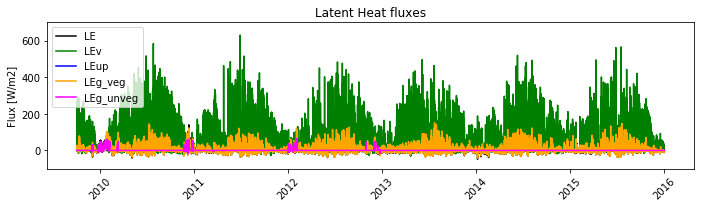

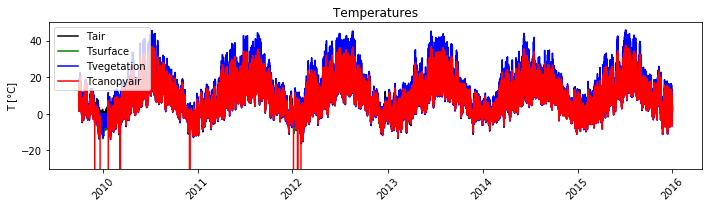

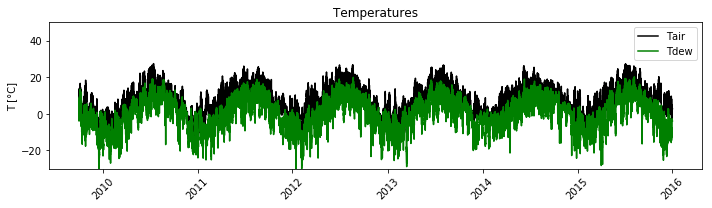

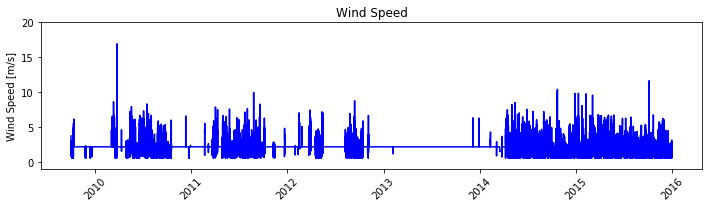

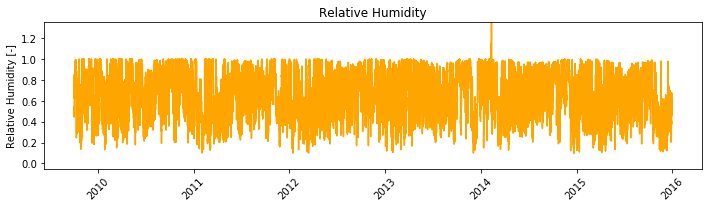

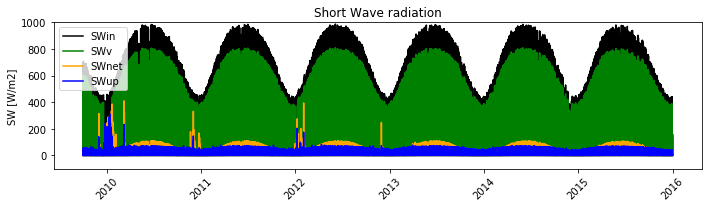

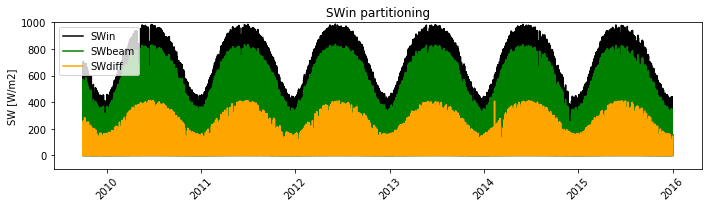

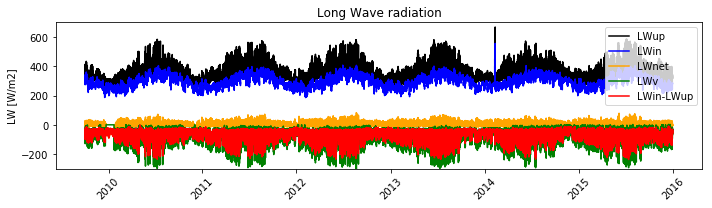

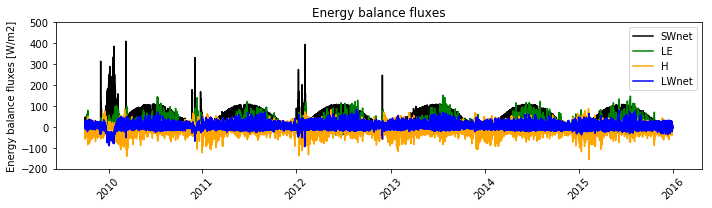

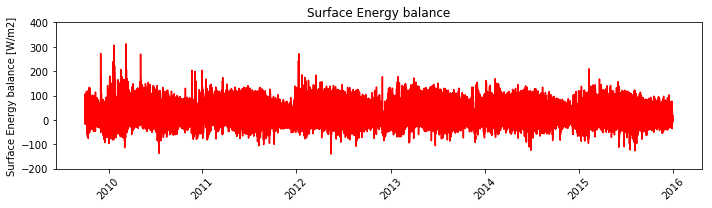

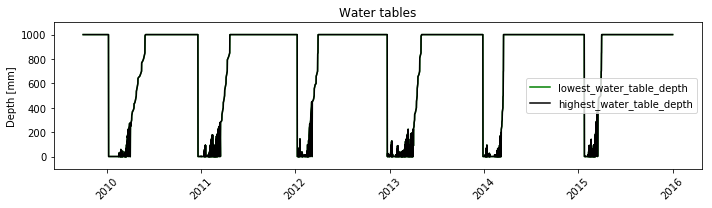

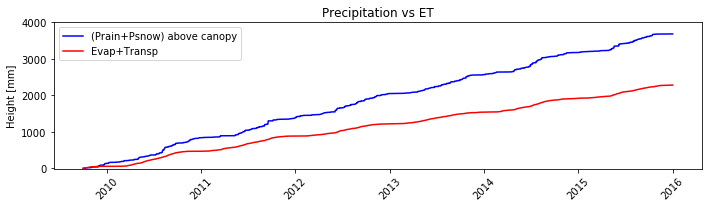

In [6]:
# %load PlotTimeSeries-point.py
# Analyse GEOtop output time series
# - point*.txt
# 
# ---
# Author: Elisa Bortoli (elisa.bortoli3@gmail.com)
# 
# Date: 08/07/2019

# Import the necessary modules
import os 
import glob
import sys
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt

# Set working paths of the simulation
try:
    sim_path = "/home/elisa/paper_GEOtop/tests/Matsch_B2_Ref_007/data_simulated/sim_3"
except:
    print("Enter the absolute path of the simulation folder!")
    sys.exit(1)  # abort
    
# Read in list of files
point_path = sim_path + r"/output-tabs/"

# Select only point0*.txt files
os.chdir(point_path)
unsorted_point_files = glob.glob("point0*.txt")

# Sort in alphabetical order files
point_files = sorted(unsorted_point_files, key=str.lower)

# Imports files into pandas dataframe
appended_data = []
for j,trace in enumerate(point_files):
    filepath = os.path.join(point_path, trace)
    traces_series = pd.read_csv(filepath,
                                parse_dates = ['Date12[DDMMYYYYhhmm]'], # Date format is correct
                                index_col = ['Date12[DDMMYYYYhhmm]'], # No more element indexes
                                dayfirst = True, # Coherent date format
                                na_values=['-9999']) # NaN 
    appended_data.append(traces_series)

# Plot the desired parameter
for i in range(0,len(point_files)):
    mydata = appended_data[i]
# LE 
    plt.figure(figsize = (10,3))
    plt.plot(mydata.index, mydata['LE[W/m2]'], color = 'black')
    plt.plot(mydata.index, mydata['LEv[W/m2]'], color = 'green')
    plt.plot(mydata.index, mydata['LEup[W/m2]'], color = 'blue')
    plt.plot(mydata.index, mydata['LEg_veg[W/m2]'], color = 'orange')
    plt.plot(mydata.index, mydata['LEg_unveg[W/m2]'], color = 'magenta')
    plt.xticks(rotation=45)
    plt.ylim(-100,700)
    plt.legend(['LE', 'LEv', 'LEup', 'LEg_veg','LEg_unveg'])
    plt.ylabel("Flux [W/m2]")
    plt.title("Latent Heat fluxes")
    plt.tight_layout()
    
# Temperatures
    plt.figure(figsize = (10,3))
    plt.plot(mydata.index, mydata['Tair[C]'], color = 'black')
    plt.plot(mydata.index, mydata['Tsurface[C]'], color = 'green')
    plt.plot(mydata.index, mydata['Tvegetation[C]'], color = 'blue')
    plt.plot(mydata.index, mydata['Tcanopyair[C]'], color = 'red')
    plt.xticks(rotation=45)
    plt.ylim(-30,50)
    plt.legend(['Tair', 'Tsurface', 'Tvegetation', 'Tcanopyair'])
    plt.ylabel("T [°C]")
    plt.title("Temperatures")
    plt.tight_layout()

# Meteo Input
    plt.figure(figsize = (10,3))
    plt.plot(mydata.index, mydata['Tair[C]'], color = 'black')
    plt.plot(mydata.index, mydata['Tdew[C]'], color = 'green')
    plt.xticks(rotation=45)
    plt.ylim(-30,50)
    plt.legend(['Tair', 'Tdew'])
    plt.ylabel("T [°C]")
    plt.title("Temperatures")
    plt.tight_layout()
    # -----------------------------------------------------------------------------------------------
    plt.figure(figsize = (10,3))
    plt.plot(mydata.index, mydata['Wind_speed[m/s]'], color = 'blue')
    plt.xticks(rotation=45)
    plt.ylim(-1,20)
    plt.ylabel("Wind Speed [m/s]")
    plt.title("Wind Speed")
    plt.tight_layout()
    # -----------------------------------------------------------------------------------------------
    plt.figure(figsize = (10,3))
    plt.plot(mydata.index, mydata['Relative_Humidity[-]'], color = 'orange')
    plt.xticks(rotation=45)
    plt.ylim(-0.05,1.35)
    plt.ylabel("Relative Humidity [-]")
    plt.title("Relative Humidity")
    plt.tight_layout()

# Short Wave Radiation
    plt.figure(figsize = (10,3))
    plt.plot(mydata.index, mydata['SWin[W/m2]'], color = 'black')
    plt.plot(mydata.index, mydata['SWv[W/m2]'], color = 'green')
    plt.plot(mydata.index, mydata['SWnet[W/m2]'], color = 'orange')
    plt.plot(mydata.index, mydata['SWup[W/m2]'], color = 'blue')
    plt.xticks(rotation=45)
    plt.ylim(-100,1000)
    plt.legend(['SWin', 'SWv','SWnet','SWup']) 
    plt.ylabel("SW [W/m2]")
    plt.title("Short Wave radiation")
    plt.tight_layout()

# SWin partitioning
    plt.figure(figsize = (10,3))
    plt.plot(mydata.index, mydata['SWin[W/m2]'], color = 'black')
    plt.plot(mydata.index, mydata['SWbeam[W/m2]'], color = 'green')
    plt.plot(mydata.index, mydata['SWdiff[W/m2]'], color = 'orange')
    plt.xticks(rotation=45)
    plt.ylim(-100,1000)
    plt.legend(['SWin', 'SWbeam','SWdiff'])
    plt.ylabel("SW [W/m2]")
    plt.title("SWin partitioning")
    plt.tight_layout()

# Long Wave radiation
    plt.figure(figsize = (10,3))
    plt.plot(mydata.index, mydata['LWup[W/m2]'], color = 'black')
    plt.plot(mydata.index, mydata['LWin[W/m2]'], color = 'blue')
    plt.plot(mydata.index, mydata['LWnet[W/m2]'], color = 'orange')
    plt.plot(mydata.index, mydata['LWv[W/m2]'], color = 'green')
    plt.plot(mydata.index, mydata['LWin[W/m2]']-mydata['LWup[W/m2]'], color = 'red')
    plt.xticks(rotation=45)
    plt.ylim(-300,700)
    plt.legend(['LWup', 'LWin','LWnet','LWv','LWin-LWup'])
    plt.ylabel("LW [W/m2]")
    plt.title("Long Wave radiation")
    plt.tight_layout()

# Energy balance at the soil/snow surface
    plt.figure(figsize = (10,3))
    plt.plot(mydata.index, mydata['SWnet[W/m2]'], color = 'black')
    plt.plot(mydata.index, mydata['LE[W/m2]'], color = 'green')
    plt.plot(mydata.index, mydata['H[W/m2]'], color = 'orange')
    plt.plot(mydata.index, mydata['LWnet[W/m2]'], color = 'blue')
    plt.xticks(rotation=45)
    plt.ylim(-200,500)
    plt.legend(['SWnet', 'LE','H','LWnet'])
    plt.ylabel("Energy balance fluxes [W/m2]")
    plt.title("Energy balance fluxes")
    plt.tight_layout()
    # -----------------------------------------------------------------------------------------------
    plt.figure(figsize = (10,3))
    plt.plot(mydata.index, mydata['Surface_Energy_balance[W/m2]'], color = 'red')
    plt.xticks(rotation=45)
    plt.ylim(-200,400)
    plt.title("Energy balance at the soil/snow surface")
    plt.ylabel("Surface Energy balance [W/m2]")
    plt.title("Surface Energy balance")
    plt.tight_layout()
    # -----------------------------------------------------------------------------------------------

# Water tables
    plt.figure(figsize = (10,3))
    plt.plot(mydata.index, mydata['lowest_water_table_depth[mm]'], color = 'green')
    plt.plot(mydata.index, mydata['highest_water_table_depth[mm]'], color = 'black')
    plt.xticks(rotation=45)
    plt.ylim(-100,1100)
    plt.legend(['lowest_water_table_depth', 'highest_water_table_depth'])
    plt.title("Water table depth")
    plt.ylabel("Depth [mm]")
    plt.title("Water tables")
    plt.tight_layout()

# Input/Output fluxes
    plt.figure(figsize = (10,3))
    plt.plot(mydata.index, (mydata['Prain_over_canopy[mm]']+mydata['Psnow_over_canopy[mm]']).cumsum(),
             color = 'blue')
    plt.plot(mydata.index, mydata['Evap_surface[mm]']+mydata['Trasp_canopy[mm]'].cumsum(), 
             color = 'red')
    plt.xticks(rotation=45)
    plt.ylim(-10,4000)
    plt.legend(['(Prain+Psnow) above canopy','Evap+Transp'])
    plt.title("Fluxes")
    plt.ylabel("Height [mm]")
    plt.title("Precipitation vs ET")
    plt.tight_layout()

plt.show() 

In [20]:
plotting_scripts = "/home/elisa/paper_GEOtop/tests/Matsch_B2_Ref_007/plotting_scripts"
os.chdir(plotting_scripts)
os.getcwd()

'/home/elisa/paper_GEOtop/tests/Matsch_B2_Ref_007/plotting_scripts'

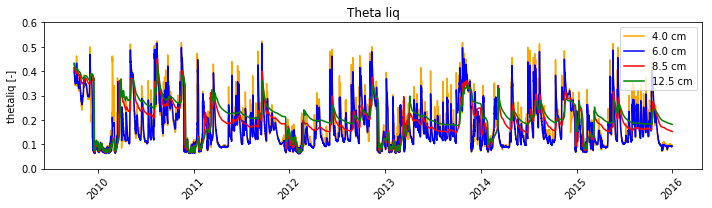

In [24]:
# %load PlotTimeSeries-theta.py
# Analyse GEOtop output time series
# - thetaliq
# - thetaice
# 
# ---
# Author: Elisa Bortoli (elisa.bortoli3@gmail.com) 
# 
# Date: 09/07/2019

# Import the necessary modules
import os
import glob
import sys
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt

# Set working paths of the simulation
try:
    sim_path = "/media/elisa/Maxtor/EURAC/POST_LAUREA/simulations/1D/Matsch_B2_Ref_007"
except:
    print("Enter the absolute path of the simulation folder!")
    sys.exit(1)  # abort

# Read in list of files
path = sim_path + r"/tabs/"

# (a) thetaliq0001.txt
# Select only thetaliq*.txt files
os.chdir(path)
unsorted_thetaliq_files = glob.glob("thetaliq*.txt")

# Sort in alphabetical order files
thetaliq_files = sorted(unsorted_thetaliq_files, key=str.lower)

# Imports files into pandas dataframe
appended_data_t = []
for j,trace in enumerate(thetaliq_files):
    filepath = os.path.join(path, trace)
    traces_series = pd.read_csv(filepath,
                                parse_dates = ['Date12[DDMMYYYYhhmm]'], # Date format is correct
                                index_col = ['Date12[DDMMYYYYhhmm]'], # No more element indexes
                                dayfirst = True) # Coherent date format
#                                na_values=['-9999']) # NaN 
    appended_data_t.append(traces_series)

# Plot data
for i in range(0,len(thetaliq_files)):
    mydata_t = appended_data_t[i]
    plt.figure(figsize = (10,3))
    plt.plot(mydata_t.index, mydata_t['40.000000 '], color = 'orange')
    plt.plot(mydata_t.index, mydata_t['60.000000 '], color = 'blue')
    plt.plot(mydata_t.index, mydata_t['175.000000 '], color = 'red')
    plt.plot(mydata_t.index, mydata_t['225.000000 '], color = 'green')

    # rotate tick labels
    plt.xticks(rotation=45)
    plt.ylim(0,0.6)
    plt.legend(['4.0 cm', '6.0 cm', '8.5 cm', '12.5 cm', '17.5 cm', '22.5 cm'])
    plt.ylabel("thetaliq [-]")
    plt.title("Theta liq")
    plt.tight_layout()
    plt.savefig(os.path.join(plotting_scripts, "thetaliq_trainee.png"))              
    plt.show()


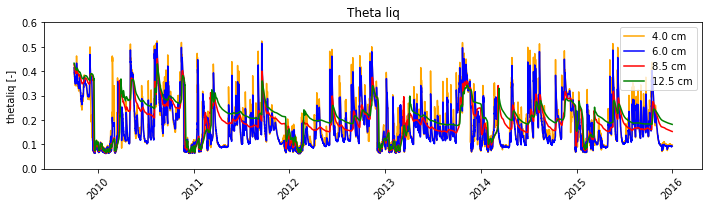

In [25]:
# %load PlotTimeSeries-theta.py
# Analyse GEOtop output time series
# - thetaliq
# - thetaice
# 
# ---
# Author: Elisa Bortoli (elisa.bortoli3@gmail.com) 
# 
# Date: 09/07/2019

# Import the necessary modules
import os
import glob
import sys
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt

# Set working paths of the simulation
try:
    sim_path = "/home/elisa/paper_GEOtop/tests/Matsch_B2_Ref_007/data_simulated/sim_3"
except:
    print("Enter the absolute path of the simulation folder!")
    sys.exit(1)  # abort

# Read in list of files
path = sim_path + r"/output-tabs/"

# (a) thetaliq0001.txt
# Select only thetaliq*.txt files
os.chdir(path)
unsorted_thetaliq_files = glob.glob("thetaliq*.txt")

# Sort in alphabetical order files
thetaliq_files = sorted(unsorted_thetaliq_files, key=str.lower)

# Imports files into pandas dataframe
appended_data_n = []
for j,trace in enumerate(thetaliq_files):
    filepath = os.path.join(path, trace)
    traces_series = pd.read_csv(filepath,
                                parse_dates = ['Date12[DDMMYYYYhhmm]'], # Date format is correct
                                index_col = ['Date12[DDMMYYYYhhmm]'], # No more element indexes
                                dayfirst = True) # Coherent date format
#                                na_values=['-9999']) # NaN 
    appended_data_n.append(traces_series)

# Plot data
for i in range(0,len(thetaliq_files)):
    mydata_n = appended_data_n[i]
    plt.figure(figsize = (10,3))
    plt.plot(mydata_n.index, mydata_n['40.000000 '], color = 'orange')
    plt.plot(mydata_n.index, mydata_n['60.000000 '], color = 'blue')
    plt.plot(mydata_n.index, mydata_n['175.000000 '], color = 'red')
    plt.plot(mydata_n.index, mydata_n['225.000000 '], color = 'green')

    # rotate tick labels
    plt.xticks(rotation=45)
    plt.ylim(0,0.6)
    plt.legend(['4.0 cm', '6.0 cm', '8.5 cm', '12.5 cm', '17.5 cm', '22.5 cm'])
    plt.ylabel("thetaliq [-]")
    plt.title("Theta liq")
    plt.tight_layout()
    plt.savefig(os.path.join(plotting_scripts, "thetaliq_now.png"))              
    plt.show()


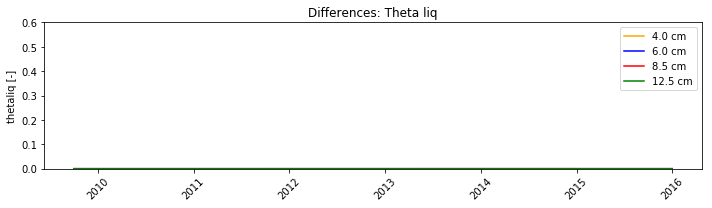

In [26]:
# Plot data
for i in range(0,len(thetaliq_files)):
    mydata_n = appended_data_n[i]
    plt.figure(figsize = (10,3))
    plt.plot(mydata_t['40.000000 ']-mydata_n['40.000000 '], color = 'orange')
    plt.plot(mydata_t['60.000000 ']-mydata_n['60.000000 '], color = 'blue')
    plt.plot(mydata_t['175.000000 ']-mydata_n['175.000000 '], color = 'red')
    plt.plot(mydata_t['225.000000 ']-mydata_n['225.000000 '], color = 'green')

    # rotate tick labels
    plt.xticks(rotation=45)
    plt.ylim(0,0.6)
    plt.legend(['4.0 cm', '6.0 cm', '8.5 cm', '12.5 cm', '17.5 cm', '22.5 cm'])
    plt.ylabel("thetaliq [-]")
    plt.title("Differences: Theta liq")
    plt.tight_layout()
    plt.show()
